In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import keras

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from keras.preprocessing.image import array_to_img, img_to_array, load_img

import os, shutil
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet', include_top = False, input_shape=(200, 200, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 200, 200, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 200, 200, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 200, 200, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 100, 100, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 100, 100, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 100, 100, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 50, 50, 128)       0     

In [ ]:
import zipfile

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import zipfile
import pathlib

#root_directory = pathlib.Path('/content/gdrive/My Drive/testcase1')
root_directory = pathlib.Path('/content/gdrive/My Drive/testcase2')
#root_directory = pathlib.Path('/content/gdrive/My Drive/testcase3')
#root_directory = pathlib.Path('/content/gdrive/My Drive/testcase4')

print(root_directory)

train_dir = pathlib.Path(root_directory, 'train1') 
print(train_dir)
test_dir = pathlib.Path(root_directory, 'test1')
print(test_dir)

train_image_count = len(list(train_dir.glob('*/*.jpg')))
print(train_image_count)
test_image_count = len(list(test_dir.glob('*/*.jpg')))
print(test_image_count)

!ls "/content/gdrive/My Drive/testcase4"

!ls "./sample_data"

/content/gdrive/My Drive/testcase2
/content/gdrive/My Drive/testcase2/train1
/content/gdrive/My Drive/testcase2/test1
312
125
test1  testcase4_result.json  train1  validation
anscombe.json		      mnist_test.csv
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


Create Validation data directory

In [ ]:
validation_dir = os.path.join(root_directory, 'validation')
#os.mkdir(validation_dir)

valid_abstracticism_dir = os.path.join(validation_dir, 'abstracticism')
#os.mkdir(valid_abstracticism_dir)

valid_baroque_dir = os.path.join(validation_dir, 'baroque')
#os.mkdir(valid_baroque_dir)

valid_impressionism_dir = os.path.join(validation_dir, 'impressionism')
#os.mkdir(valid_impressionism_dir)

valid_minimalism_dir = os.path.join(validation_dir, 'minimalism')
#os.mkdir(valid_minimalism_dir)

valid_popart_dir = os.path.join(validation_dir, 'popart')
#os.mkdir(valid_popart_dir)

!ls "/content/gdrive/My Drive/testcase4/validation"

abstracticism  baroque	impressionism  minimalism  popart


In [ ]:
train_abstracticism_dir = pathlib.Path(train_dir, 'abstracticism')
print(train_abstracticism_dir)
test_abstracticism_dir = pathlib.Path(test_dir, 'abstracticism')
print(test_abstracticism_dir)

train_baroque_dir = pathlib.Path(train_dir, 'baroque')
print(train_baroque_dir)
test_baroque_dir = pathlib.Path(test_dir, 'baroque')
print(test_baroque_dir)

train_impressionism_dir = os.path.join(train_dir, 'impressionism')
print(train_impressionism_dir)
test_impressionism_dir = os.path.join(test_dir, 'impressionism')
print(test_impressionism_dir)

train_minimalism_dir = os.path.join(train_dir, 'minimalism')
print(train_minimalism_dir)
test_minimalism_dir = os.path.join(test_dir, 'minimalism')
print(test_minimalism_dir)

train_popart_dir = pathlib.Path(train_dir, 'popart')
print(train_popart_dir)
test_popart_dir = pathlib.Path(test_dir, 'popart')
print(test_popart_dir)

/content/gdrive/My Drive/testcase2/train1/abstracticism
/content/gdrive/My Drive/testcase2/test1/abstracticism
/content/gdrive/My Drive/testcase2/train1/baroque
/content/gdrive/My Drive/testcase2/test1/baroque
/content/gdrive/My Drive/testcase2/train1/impressionism
/content/gdrive/My Drive/testcase2/test1/impressionism
/content/gdrive/My Drive/testcase2/train1/minimalism
/content/gdrive/My Drive/testcase2/test1/minimalism
/content/gdrive/My Drive/testcase2/train1/popart
/content/gdrive/My Drive/testcase2/test1/popart


Create validation dataset by extracting from train dataset

In [ ]:
'''
fnames = ['abstracticism.{}.jpg'.format(i) for i in range(1, 100, 5)]
for fname in fnames:
  src = os.path.join(train_abstracticism_dir, fname)
  dst = os.path.join(valid_abstracticism_dir, fname)
  shutil.move(src, dst)


fnames = ['baroque.{}.jpg'.format(i) for i in range(1, 100, 5)]
for fname in fnames:
  src = os.path.join(train_baroque_dir, fname)
  dst = os.path.join(valid_baroque_dir, fname)
  shutil.move(src, dst)

fnames = ['impressionism.{}.jpg'.format(i) for i in range(101, 200, 5)]
for fname in fnames:
  src = os.path.join(train_impressionism_dir, fname)
  dst = os.path.join(valid_impressionism_dir, fname)
  shutil.move(src, dst)

fnames = ['minimalism.{}.jpg'.format(i) for i in range(1, 100, 5)]
for fname in fnames:
  src = os.path.join(train_minimalism_dir, fname)
  dst = os.path.join(valid_minimalism_dir, fname)
  shutil.move(src, dst)

fnames = ['popart.{}.jpg'.format(i) for i in range(1, 100, 5)]
for fname in fnames:
  src = os.path.join(train_popart_dir, fname)
  dst = os.path.join(valid_popart_dir, fname)
  shutil.move(src, dst)
'''


"\nfnames = ['abstracticism.{}.jpg'.format(i) for i in range(1, 100, 5)]\nfor fname in fnames:\n  src = os.path.join(train_abstracticism_dir, fname)\n  dst = os.path.join(valid_abstracticism_dir, fname)\n  shutil.move(src, dst)\n\n\nfnames = ['baroque.{}.jpg'.format(i) for i in range(1, 100, 5)]\nfor fname in fnames:\n  src = os.path.join(train_baroque_dir, fname)\n  dst = os.path.join(valid_baroque_dir, fname)\n  shutil.move(src, dst)\n\nfnames = ['impressionism.{}.jpg'.format(i) for i in range(101, 200, 5)]\nfor fname in fnames:\n  src = os.path.join(train_impressionism_dir, fname)\n  dst = os.path.join(valid_impressionism_dir, fname)\n  shutil.move(src, dst)\n\nfnames = ['minimalism.{}.jpg'.format(i) for i in range(1, 100, 5)]\nfor fname in fnames:\n  src = os.path.join(train_minimalism_dir, fname)\n  dst = os.path.join(valid_minimalism_dir, fname)\n  shutil.move(src, dst)\n\nfnames = ['popart.{}.jpg'.format(i) for i in range(1, 100, 5)]\nfor fname in fnames:\n  src = os.path.join(t

In [ ]:
CLASS_NAMES = np.array([item.name for item in test_dir.glob('*') if item.name != "LICENSE.txt"])
print(CLASS_NAMES)

CLASSES_NAMES = ['abstracticism', 'baroque', 'impressionism', 'minimalism', 'popart']
print(CLASSES_NAMES)


['minimalism' 'impressionism' 'abstracticism' 'popart' 'baroque']
['abstracticism', 'baroque', 'impressionism', 'minimalism', 'popart']


In [ ]:
num_abstracticism_tr = len(os.listdir(train_abstracticism_dir))
print('train abstracticism num:', num_abstracticism_tr) 
num_abstracticism_vd = len(os.listdir(valid_abstracticism_dir))
print('validation abstracticism num: ', num_abstracticism_vd)
num_abstracticism_tt = len(os.listdir(test_abstracticism_dir))
print('test abstracticism num: ', num_abstracticism_tt)

num_baroque_tr = len(os.listdir(train_baroque_dir))
print('train baroque num: ', num_baroque_tr)
num_baroque_vd = len(os.listdir(valid_baroque_dir))
print('validation baroque num: ', num_baroque_vd)
num_baroque_tt = len(os.listdir(test_baroque_dir))
print('test baroque num: ', num_baroque_tt)

num_impressionism_tr = len(os.listdir(train_impressionism_dir))
print('train impressionism num: ', num_impressionism_tr)
num_impressionism_vd = len(os.listdir(valid_impressionism_dir))
print('validation impressnionsim num: ', num_impressionism_vd)
num_impressionism_tt = len(os.listdir(test_impressionism_dir))
print('test impressionism num: ', num_impressionism_tt)

num_minimalism_tr = len(os.listdir(train_minimalism_dir))
print('train minimalism num: ', num_minimalism_tr)
num_minimalism_vd = len(os.listdir(valid_minimalism_dir))
print('validation minimalism num: ', num_minimalism_vd)
num_minimalism_tt = len(os.listdir(test_minimalism_dir))
print('test minimalism num: ', num_minimalism_tt)

num_popart_tr = len(os.listdir(train_popart_dir))
print('train popart num: ', num_popart_tr)
num_popart_vd = len(os.listdir(valid_popart_dir))
print('validation popart num: ', num_popart_vd)
num_popart_tt = len(os.listdir(test_popart_dir))
print('test popart num: ', num_popart_tt)

print('------------------------------------------')
total_train = num_abstracticism_tr + num_baroque_tr + num_impressionism_tr + num_minimalism_tr + num_popart_tr
total_valid = num_abstracticism_vd + num_baroque_vd + num_impressionism_vd + num_minimalism_vd + num_popart_vd
total_test = num_abstracticism_tt + num_baroque_tt + num_impressionism_tt + num_minimalism_tt + num_popart_tt
print('total training datatset: ', total_train)
print('total validation dataset: ', total_valid)
print('total test dataset: ', total_test)

train abstracticism num: 50
validation abstracticism num:  0
test abstracticism num:  25
train baroque num:  50
validation baroque num:  0
test baroque num:  25
train impressionism num:  50
validation impressnionsim num:  0
test impressionism num:  25
train minimalism num:  81
validation minimalism num:  0
test minimalism num:  25
train popart num:  81
validation popart num:  0
test popart num:  25
------------------------------------------
total training datatset:  312
total validation dataset:  0
total test dataset:  125


In [ ]:
datagen = ImageDataGenerator(rescale = 1./255)
batch_size = 32
epochs = 20

In [ ]:
def extract_features(directory, sample_count, shuffle_value):
  features = np.zeros(shape=(sample_count, 6, 6, 512))
  labels = np.zeros(shape=(sample_count, 5)) 
  generator = datagen.flow_from_directory(directory, target_size = (200,200), 
                                          batch_size = batch_size, class_mode = 'categorical', 
                                          shuffle = shuffle_value)
  i = 0
  for inputs_batch, labels_batch in generator:
      features_batch = conv_base.predict(inputs_batch)
      features[i * batch_size : (i + 1) * batch_size] = features_batch
      labels[i * batch_size : (i + 1) * batch_size] = labels_batch
      i+=1
      if i * batch_size >= sample_count:
        break
  return features, labels, generator

train_features, train_labels, train_generator = extract_features(train_dir, total_train, True)
#validation_features, validation_labels, validation_generator = extract_features(validation_dir, total_valid, False)
test_features, test_labels, test_generator = extract_features(test_dir, total_test, False)


Found 312 images belonging to 5 classes.
Found 125 images belonging to 5 classes.


In [ ]:
train_features = np.reshape(train_features, (total_train, 6 * 6 * 512))
print(train_features.shape)
print(train_labels.shape)

#validation_features = np.reshape(validation_features, (total_valid, 6 * 6 * 512))
#print(validation_features.shape)

test_features = np.reshape(test_features, (total_test, 6 * 6 * 512))
print(test_features.shape)

(312, 18432)
(312, 5)
(125, 18432)


In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_dim = 6*6*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer=optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               9437696   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 2565      
Total params: 9,440,261
Trainable params: 9,440,261
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_features, train_labels, epochs = epochs,
                    batch_size= batch_size) #,
                    #validation_data = (validation_features, validation_labels))

Epoch 1/20
312/312 [==============================] - 1s 5ms/step - loss: 3.4358 - accuracy: 0.4391
Epoch 2/20
312/312 [==============================] - 1s 4ms/step - loss: 0.7665 - accuracy: 0.7853
Epoch 3/20
312/312 [==============================] - 1s 4ms/step - loss: 0.2725 - accuracy: 0.9135
Epoch 4/20
312/312 [==============================] - 1s 4ms/step - loss: 0.1364 - accuracy: 0.9487
Epoch 5/20
312/312 [==============================] - 1s 4ms/step - loss: 0.0738 - accuracy: 0.9776
Epoch 6/20
312/312 [==============================] - 1s 4ms/step - loss: 0.0442 - accuracy: 0.9840
Epoch 7/20
312/312 [==============================] - 1s 4ms/step - loss: 0.0220 - accuracy: 0.9936
Epoch 8/20
312/312 [==============================] - 2s 6ms/step - loss: 0.0156 - accuracy: 1.0000
Epoch 9/20
312/312 [==============================] - 2s 6ms/step - loss: 0.0158 - accuracy: 0.9968
Epoch 10/20
312/312 [==============================] - 2s 6ms/step - loss: 0.0097 - accuracy: 1.0000

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)
#epochs_range = range(1, len(loss) + 1)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Testing Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Testing Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Testing Loss')
plt.legend(loc='upper right')
plt.title('Training and Testing Loss')
plt.show()

KeyError: ignored

In [ ]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print(test_acc)


125/125 [==============================] - 0s 733us/step
0.9200000166893005


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
predictions = model.predict_classes(test_features)
print(predictions.size)
#y_pred = np.argmax(predictions, axis=1)
y_pred = predictions
print('Confusion Matrix')
#print(test_generator.classes)
cm = confusion_matrix(test_generator.classes, y_pred)
print(cm)
print('Classification Report')
 
print(classification_report(test_generator.classes, y_pred, target_names=CLASSES_NAMES))



125
Confusion Matrix
[[24  0  0  0  1]
 [ 0 24  1  0  0]
 [ 0  7 18  0  0]
 [ 0  0  0 25  0]
 [ 1  0  0  0 24]]
Classification Report
               precision    recall  f1-score   support

abstracticism       0.96      0.96      0.96        25
      baroque       0.77      0.96      0.86        25
impressionism       0.95      0.72      0.82        25
   minimalism       1.00      1.00      1.00        25
       popart       0.96      0.96      0.96        25

     accuracy                           0.92       125
    macro avg       0.93      0.92      0.92       125
 weighted avg       0.93      0.92      0.92       125



In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm = cm*100
    print('\nNormalized Confusion Matrix')
  else: 
    print('\nConfusion Matrix, without Normalization')
   
  print(cm)
  print()

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=90)
  plt.yticks(tick_marks, classes)


  fmt = '.0f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
     plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


Confusion Matrix, without Normalization
[[24  0  0  0  1]
 [ 0 24  1  0  0]
 [ 0  7 18  0  0]
 [ 0  0  0 25  0]
 [ 0  0  0  0 25]]



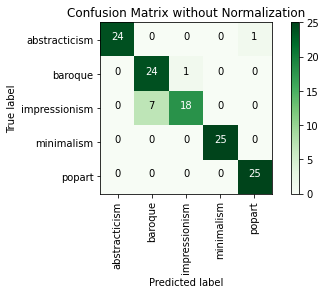

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

y_pred = predictions

cnf_matrix = confusion_matrix(test_generator.classes, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=CLASSES_NAMES, title ='Confusion Matrix without Normalization')

In [ ]:
valid_filenames = validation_generator.filenames

valid_ground_truth = validation_generator.classes

val_label2index = validation_generator.class_indices

# getting the mapping from class index to class label
val_idx2label = dict((v,k) for k,v in val_label2index.items())

NameError: ignored

In [ ]:
val_predictions = model.predict_classes(validation_features)
valid_prob = model.predict(validation_features)

NameError: ignored

In [ ]:
val_errors = np.where(val_predictions != valid_ground_truth)[0]
print("No of error = {}/{}".format(len(val_errors), total_valid))

NameError: ignored

In [ ]:
test_filenames = test_generator.filenames
test_ground_truth = test_generator.classes
test_label2index = test_generator.class_indices
test_idx2label = dict((v, k) for k, v in test_label2index.items())



In [ ]:
test_predictions = model.predict_classes(test_features)
test_prob = model.predict(test_features)

test_errors = np.where(test_predictions != test_ground_truth)[0]
print("No of error = {}/{}".format(len(test_errors), total_test))
print(test_errors)

test_correct = np.where(test_predictions == test_ground_truth)[0]
print("Correct Prediction = {}/{}".format(len(test_correct), total_test))
print(test_correct)

No of error = 9/125
[24 37 60 61 63 66 67 68 72]
Correct Prediction = 116/125
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  25  26  27  28  29  30  31  32  33  34  35  36
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  62  64  65  69  70  71  73  74  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98
  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116
 117 118 119 120 121 122 123 124]


In [ ]:
from random import seed
from random import randint

seed(1)
numnum = len(test_correct) / len(CLASSES_NAMES)
#print(numnum)

correct_path_lists = []
for j in range(len(CLASSES_NAMES)):
  print(j)
  for _ in range(3):
    numnum = int(numnum)
    print(str(numnum*j) + " ~ " + str(numnum*(j+1)))
    i = randint((numnum*j)+1, (numnum*(j+1)))
    print(i)
    pred_class = np.argmax(test_prob[test_correct[i]])
    #print(pred_class)
    pred_label = test_idx2label[pred_class]
    #print(pred_label)

    true_label = test_filenames[test_correct[i]].split('/')[0]
    #print(true_label)
    #print('True label : {}, Prediction : {}, confidence : {:.3f}'.format(
      #test_filenames[test_correct[i]].split('/')[0],
      #pred_label,
      #test_prob[test_correct[i]][pred_class]))
  

    #original = load_img('{}/{}'.format(test_dir, test_filenames[test_correct[i]]))
    original_path = ('{}/{}'.format(test_dir, test_filenames[test_correct[i]]))
  
    img_data = [true_label, pred_label, original_path];
    correct_path_lists.append(img_data);
    #print("original path: " + original_path)
    #print(original)
  
  


  #plt.imshow(original)
  #plt.show()

print(correct_path_lists)  

0
0 ~ 23
5
0 ~ 23
19
0 ~ 23
3
1
23 ~ 46
32
23 ~ 46
27
23 ~ 46
39
2
46 ~ 69
61
46 ~ 69
62
46 ~ 69
67
3
69 ~ 92
82
69 ~ 92
76
69 ~ 92
73
4
92 ~ 115
108
92 ~ 115
93
92 ~ 115
105
[['abstracticism', 'abstracticism', '/content/gdrive/My Drive/testcase2/test1/abstracticism/abstracticism.110.jpg'], ['abstracticism', 'abstracticism', '/content/gdrive/My Drive/testcase2/test1/abstracticism/abstracticism.134.jpg'], ['abstracticism', 'abstracticism', '/content/gdrive/My Drive/testcase2/test1/abstracticism/abstracticism.107.jpg'], ['baroque', 'baroque', '/content/gdrive/My Drive/testcase2/test1/baroque/baroque.114.jpg'], ['baroque', 'baroque', '/content/gdrive/My Drive/testcase2/test1/baroque/baroque.105.jpg'], ['baroque', 'baroque', '/content/gdrive/My Drive/testcase2/test1/baroque/baroque.131.jpg'], ['impressionism', 'impressionism', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.218.jpg'], ['impressionism', 'impressionism', '/content/gdrive/My Drive/testcase2/test1/impress

Which images were predicted wrongly in test datasets

4
popart
abstracticism
True label : abstracticism, Prediction : popart, confidence : 0.910
original path: /content/gdrive/My Drive/testcase2/test1/abstracticism/abstracticism.140.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=475x600 at 0x7FD9DB15FCC0>


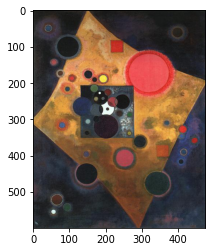

2
impressionism
baroque
True label : baroque, Prediction : impressionism, confidence : 0.996
original path: /content/gdrive/My Drive/testcase2/test1/baroque/baroque.123.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=750x557 at 0x7FD9DAC93978>


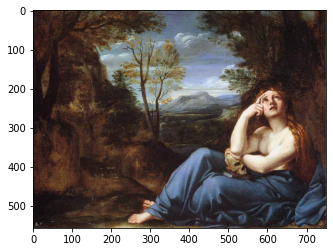

1
baroque
impressionism
True label : impressionism, Prediction : baroque, confidence : 0.957
original path: /content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.18.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=733x600 at 0x7FD9DAC4C438>


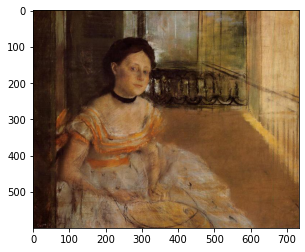

1
baroque
impressionism
True label : impressionism, Prediction : baroque, confidence : 0.743
original path: /content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.19.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=636x415 at 0x7FD9DAC23898>


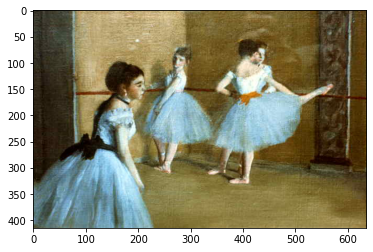

1
baroque
impressionism
True label : impressionism, Prediction : baroque, confidence : 0.985
original path: /content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.2.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=473x600 at 0x7FD9DAB88E10>


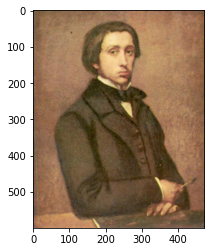

1
baroque
impressionism
True label : impressionism, Prediction : baroque, confidence : 1.000
original path: /content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.203.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=210x166 at 0x7FD9DABD27B8>


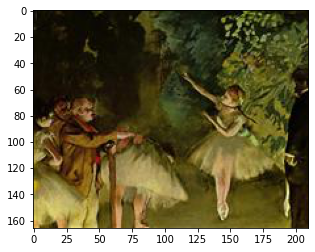

1
baroque
impressionism
True label : impressionism, Prediction : baroque, confidence : 0.532
original path: /content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.205.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=210x306 at 0x7FD9DAAE7C50>


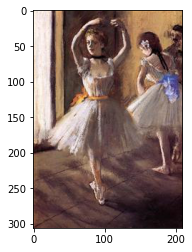

1
baroque
impressionism
True label : impressionism, Prediction : baroque, confidence : 0.941
original path: /content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.209.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=210x287 at 0x7FD9DAA78F28>


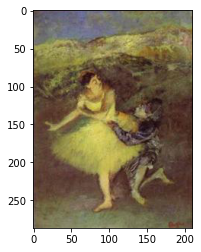

1
baroque
impressionism
True label : impressionism, Prediction : baroque, confidence : 0.976
original path: /content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.5.jpg
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=492x600 at 0x7FD9DAC93DD8>


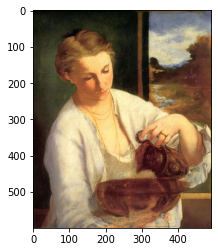

[['abstracticism', 'popart', '/content/gdrive/My Drive/testcase2/test1/abstracticism/abstracticism.140.jpg'], ['baroque', 'impressionism', '/content/gdrive/My Drive/testcase2/test1/baroque/baroque.123.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.18.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.19.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.2.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.203.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.205.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.209.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.5.jpg']]


In [ ]:
error_path_lists = []
for i in range(len(test_errors)):
  pred_class = np.argmax(test_prob[test_errors[i]])
  print(pred_class)
  pred_label = test_idx2label[pred_class]
  print(pred_label)

  true_label = test_filenames[test_errors[i]].split('/')[0]
  print(true_label)
  print('True label : {}, Prediction : {}, confidence : {:.3f}'.format(
      test_filenames[test_errors[i]].split('/')[0],
      pred_label,
      test_prob[test_errors[i]][pred_class]))
  

  original = load_img('{}/{}'.format(test_dir, test_filenames[test_errors[i]]))
  original_path = ('{}/{}'.format(test_dir, test_filenames[test_errors[i]]))
  
  img_data = [true_label, pred_label, original_path];
  error_path_lists.append(img_data);
  print("original path: " + original_path)
  print(original)
  
  plt.imshow(original)
  plt.show()

print(error_path_lists)  

In [ ]:
print(error_path_lists)
print(len(error_path_lists))
print(error_path_lists[0][2])

print(correct_path_lists)

[['abstracticism', 'popart', '/content/gdrive/My Drive/testcase2/test1/abstracticism/abstracticism.140.jpg'], ['baroque', 'impressionism', '/content/gdrive/My Drive/testcase2/test1/baroque/baroque.123.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.18.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.19.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.2.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.203.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.205.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.209.jpg'], ['impressionism', 'baroque', '/content/gdrive/My Drive/testcase2/test1/impressionism/impressionism.5.jpg']]
9
/content/gdrive/My Drive/t

In [ ]:
test_name = "testcase 2"
print(test_name)
print(test_acc)
print(CLASS_NAMES)
class_name_list = CLASSES_NAMES
print(class_name_list)
print(class_name_list[0])

testcase 2
0.9200000166893005
['minimalism' 'impressionism' 'abstracticism' 'popart' 'baroque']
['abstracticism', 'baroque', 'impressionism', 'minimalism', 'popart']
abstracticism


In [ ]:
cmr = classification_report(test_generator.classes, y_pred, target_names=CLASSES_NAMES)
print(cmr)
print(type(cmr))
cm_report = classification_report(test_generator.classes, y_pred, target_names=CLASSES_NAMES, output_dict=True)
cm_label = ['precision', 'recall', 'f1-score', 'support']
print(cm_label)
print(len(cm_label))
print(cm_report)
print(len(class_name_list))

print(type(cm_report))
print("cm_report length: ", len(cm_report))

print(class_name_list[0])
print(cm_report[class_name_list[0]])
print(cm_report[class_name_list[0]]['f1-score'])
print(cm_report[class_name_list[0]][cm_label[2]])

print(type(cm_report[class_name_list[0]][cm_label[0]]));
#f1-score = float(cm_report[class_name_list[0]]['f1-score']);
#for i in range(len(cm_label))
f1_score = f"{cm_report[class_name_list[0]][cm_label[0]]:.2f}"
print(f1_score)

for idx in range(len(class_name_list)):
  #print(class_name_list[idx])
  for dex in range(len(cm_label) - 1):
    #print(cm_label[dex])
    cm_report[class_name_list[idx]][cm_label[dex]] = f"{cm_report[class_name_list[idx]][cm_label[dex]]:.2f}"

print(cm_report)

uuid = 'd0a1dfb8-69a5-48a4-952d-c6cde87a6aca';
uuid_1 = uuid.split('-')[0]
print(uuid_1)



               precision    recall  f1-score   support

abstracticism       0.96      0.96      0.96        25
      baroque       0.77      0.96      0.86        25
impressionism       0.95      0.72      0.82        25
   minimalism       1.00      1.00      1.00        25
       popart       0.96      0.96      0.96        25

     accuracy                           0.92       125
    macro avg       0.93      0.92      0.92       125
 weighted avg       0.93      0.92      0.92       125

<class 'str'>
['precision', 'recall', 'f1-score', 'support']
4
{'abstracticism': {'precision': 0.96, 'recall': 0.96, 'f1-score': 0.96, 'support': 25}, 'baroque': {'precision': 0.7741935483870968, 'recall': 0.96, 'f1-score': 0.8571428571428571, 'support': 25}, 'impressionism': {'precision': 0.9473684210526315, 'recall': 0.72, 'f1-score': 0.8181818181818181, 'support': 25}, 'minimalism': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 25}, 'popart': {'precision': 0.96, 'recall': 0.96, 

In [ ]:
cmlist = cm.tolist()
print(cmlist)
print(cmlist[0][0])

[[24, 0, 0, 0, 1], [0, 24, 1, 0, 0], [0, 7, 18, 0, 0], [0, 0, 0, 25, 0], [0, 0, 0, 0, 25]]
24


In [ ]:
total_train = num_abstracticism_tr + num_baroque_tr + num_impressionism_tr + num_minimalism_tr + num_popart_tr
total_valid = num_abstracticism_vd + num_baroque_vd + num_impressionism_vd + num_minimalism_vd + num_popart_vd
total_test = num_abstracticism_tt + num_baroque_tt + num_impressionism_tt + num_minimalism_tt + num_popart_tt

In [ ]:
import json 

results_json = {
    "test_name" : test_name,
    "test_accuracy" : test_acc,
    "classes" : class_name_list,
    "data_number" : {
        "train_data" : {
            "total_train" : total_train,
            "abstracticism" : num_abstracticism_tr,
            "baroque" : num_baroque_tr,
            "impressionism" : num_impressionism_tr,
            "minimalism" : num_minimalism_tr,
            "popart" : num_popart_tr
        },
        "test_data" : {
            "total_test" : total_test,
            "abstracticism" : num_abstracticism_tt,
            "baroque" : num_baroque_tt,
            "impressionism" : num_impressionism_tt,
            "minimalism" : num_minimalism_tt,
            "popart" : num_popart_tt
        }        
    },
    "confusion_report" : {
        class_name_list[0] : cm_report[class_name_list[0]],
        class_name_list[1] : cm_report[class_name_list[1]],
        class_name_list[2] : cm_report[class_name_list[2]],
        class_name_list[3] : cm_report[class_name_list[3]],
        class_name_list[4] : cm_report[class_name_list[4]]
    },
    "confusion_matrix" : cmlist,
    "test_images" : {
        "wrong_predicted_counts" : len(test_errors),
        "wrong_path" : error_path_lists,
        "sample_images_counts" : len(correct_path_lists),
        "sample_images_paths" : correct_path_lists
    }
}

json_results = json.dumps(results_json, indent = 4)
print(json_results)



{
    "test_name": "testcase 2",
    "test_accuracy": 0.9279999732971191,
    "classes": [
        "abstracticism",
        "baroque",
        "impressionism",
        "minimalism",
        "popart"
    ],
    "data_number": {
        "train_data": {
            "total_train": 312,
            "abstracticism": 50,
            "baroque": 50,
            "impressionism": 50,
            "minimalism": 81,
            "popart": 81
        },
        "test_data": {
            "total_test": 125,
            "abstracticism": 25,
            "baroque": 25,
            "impressionism": 25,
            "minimalism": 25,
            "popart": 25
        }
    },
    "confusion_report": {
        "abstracticism": {
            "precision": "1.00",
            "recall": "0.96",
            "f1-score": "0.98",
            "support": 25
        },
        "baroque": {
            "precision": "0.77",
            "recall": "0.96",
            "f1-score": "0.86",
            "support": 25
        },
 

In [ ]:
sss = results_json["confusion_report"]["popart"]["precision"]
print(sss)

aaa = results_json["confusion_matrix"]
print(aaa)

1.0
[[25, 0, 0, 0, 0], [0, 23, 2, 0, 0], [0, 2, 23, 0, 0], [0, 0, 0, 25, 0], [0, 0, 0, 0, 25]]


In [ ]:
with open('/content/gdrive/My Drive/testcase2/testcase2_result.json', 'w') as json_file:
  json.dump(results_json, json_file, indent = 4)


In [ ]:
qwe = 0.9879283948 
qwe = f"{qwe:.3f}"

ff = float(wer)
print(qwe)
print(wer)
print(ff)

0.988
0.988
0.988


In [ ]:
import json 

jsonex = {'param_id': 'art_classification', 'instance_label': ["impressionism#/static/art_classification/aaa.125.jpg", "impressionism#/static/art_classification/aaa.144.jpg", "abstracticism#/static/art_classification/aaa.448.jpg", "baroque#/static/art_classification/aaa.56.jpg", "impressionism#/static/art_classification/aaa.401.jpg", "minimalism#/static/art_classification/aaa.302.jpg", "baroque#/static/art_classification/aaa.292.jpg", "abstracticism#/static/art_classification/aaa.284.jpg", "impressionism#/static/art_classification/aaa.330.jpg", "popart#/static/art_classification/aaa.314.jpg"]}

json_ex = json.dumps(jsonex, indent = 4)
print(json_ex)


{
    "param_id": "art_classification",
    "instance_label": [
        "impressionism#/static/art_classification/aaa.125.jpg",
        "impressionism#/static/art_classification/aaa.144.jpg",
        "abstracticism#/static/art_classification/aaa.448.jpg",
        "baroque#/static/art_classification/aaa.56.jpg",
        "impressionism#/static/art_classification/aaa.401.jpg",
        "minimalism#/static/art_classification/aaa.302.jpg",
        "baroque#/static/art_classification/aaa.292.jpg",
        "abstracticism#/static/art_classification/aaa.284.jpg",
        "impressionism#/static/art_classification/aaa.330.jpg",
        "popart#/static/art_classification/aaa.314.jpg"
    ]
}


In [ ]:
qqq = jsonex["instance_label"]
print(len(qqq))
print(qqq[1])

10
impressionism#/static/art_classification/aaa.144.jpg


In [ ]:
for i in range(len(qqq)):
  line_list = qqq[i].split('#')
  category = line_list[0]
  img_path = line_list[1]
  img_path_list = img_path.split('/')
  path_name = img_path_list[3]
  name_list = path_name.split('.')
  name_list[0] = category;
  name_list = '.'.join(name_list)
  print(category)
  print(img_path)
  print(path_name)
  print(name_list)
  print("--------------")
  img_path_list[3] = name_list
  img_path_list = '/'.join(img_path_list)
  line_list[1] = img_path_list
  qqq[i] = [line_list[0], line_list[1]]
  print(line_list)
  print("================")

print(qqq)
jsonex["instance_label"] = qqq
print(jsonex)
json_ex = json.dumps(jsonex, indent = 4)
print(json_ex)

impressionism
/static/art_classification/impressionism.125.jpg
impressionism.125.jpg
impressionism.125.jpg
--------------
['impressionism', '/static/art_classification/impressionism.125.jpg']
impressionism
/static/art_classification/impressionism.144.jpg
impressionism.144.jpg
impressionism.144.jpg
--------------
['impressionism', '/static/art_classification/impressionism.144.jpg']
abstracticism
/static/art_classification/abstracticism.448.jpg
abstracticism.448.jpg
abstracticism.448.jpg
--------------
['abstracticism', '/static/art_classification/abstracticism.448.jpg']
baroque
/static/art_classification/baroque.56.jpg
baroque.56.jpg
baroque.56.jpg
--------------
['baroque', '/static/art_classification/baroque.56.jpg']
impressionism
/static/art_classification/impressionism.401.jpg
impressionism.401.jpg
impressionism.401.jpg
--------------
['impressionism', '/static/art_classification/impressionism.401.jpg']
minimalism
/static/art_classification/minimalism.302.jpg
minimalism.302.jpg
mini

In [ ]:
import pathlib, os

root_directory = pathlib.Path('/static')
exercise1_dir = os.path.join(root_directory, 'exercise1')
#os.mkdir(exercise1_dir)
